# Feature Engineering

### Features to add:
    - Sentiment polarity (how positive the description is)
    - Sentiment subjectivity (how factual the description is)
    - Distance to Downtown Minneapolis
    - Bathrooms per sq. ft.
    - Bedrooms per sq. ft.

In [151]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [133]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [134]:
dataframe = pd.read_csv('filtered_data.csv')

In [135]:
dataframe.head()

,Unnamed: 0,bedrooms,bathrooms,bathroomsFull,bathroomsThreeQuarter,bathroomsHalf,bathroomsOneQuarter,hasHeating,hasCooling,hasFireplace,furnished,livingArea,garageSpaces,hasAttachedGarage,hasGarage,hasOpenParking,hasCarport,stories,hasPrivatePool,hasSpa,hasView,hasWaterfrontView,canRaiseHorses,hasAttachedProperty,hasLandLease,isNewConstruction,hasHomeWarranty,hasPetsAllowed,hasRentControl,isSeniorCommunity,zipcode,latitude,longitude,price,photoCount,imageId,description,imageIdCount,flooring_Carpet,flooring_Ceramic,flooring_Concrete,flooring_Hardwood,flooring_Laminate,flooring_Linoleum / Vinyl,flooring_Mixed,flooring_Other,flooring_Slate,flooring_Softwood,flooring_Tile,flooring_carpet,flooring_hardwood,flooring_laminate,flooring_tile,heating_Baseboard,heating_Forced Air,heating_Forced air,heating_Geothermal,heating_Heat pump,heating_Other,heating_Radiant,heating_Stove,heating_Wall,heating_baseboard,heating_forced air,heating_heat pump,cooling_C,cooling_Central,cooling_Evaporative,cooling_Geothermal,cooling_None,cooling_Other,cooling_Refrigeration,cooling_Solar,cooling_Wall,cooling_central,appliances_Air-To-Air Exchanger,appliances_Central Vacuum,appliances_Cooktop,appliances_Dehumidifier,appliances_Dishwasher,appliances_Disposal,appliances_Double Oven,appliances_Dryer,appliances_Dryer Included,appliances_Electric Dryer Connection,appliances_Electric Water Heater,appliances_Electronic Air Filter,appliances_Exhaust Fan/Hood,appliances_Freezer,appliances_Fuel Tank - Owned,appliances_Fuel Tank - Rented,appliances_Furnace Humidifier,appliances_Garbage disposal,appliances_Gas Dryer Connections,appliances_Gas Water Heater,appliances_Hood,appliances_Indoor Grill,appliances_Iron Filter,appliances_Microwave,appliances_None,appliances_Other,appliances_Oven,appliances_Range,appliances_Range / Oven,appliances_Range/Stove,appliances_Refrigerator,appliances_Tankless Water Heater,appliances_Trash Compactor,appliances_Trash compactor,appliances_Wall Oven,appliances_Washer,appliances_Washer Included,appliances_Water Filtration System,appliances_Water Osmosis System,appliances_Water Softener - Owned,appliances_Water Softener - Rented,appliances_dishwasher,appliances_dryer,appliances_range oven,appliances_refrigerator,appliances_washer,parkingFeatures_Attached Garage,parkingFeatures_Carport,parkingFeatures_Covered Parking,parkingFeatures_Detached Garage,parkingFeatures_Garage,parkingFeatures_None,parkingFeatures_Off street,parkingFeatures_On street,parkingFeatures_garage attached,parkingFeatures_garage detached,exteriorFeatures_Brick,exteriorFeatures_Cement concrete,exteriorFeatures_Composition,exteriorFeatures_Metal,exteriorFeatures_Other,exteriorFeatures_Shingle,exteriorFeatures_Stone,exteriorFeatures_Stucco,exteriorFeatures_Vinyl,exteriorFeatures_Wood,exteriorFeatures_Wood products,exteriorFeatures_deck,exteriorFeatures_fenced yard,exteriorFeatures_lawn,exteriorFeatures_parking,exteriorFeatures_patio,exteriorFeatures_porch,foundationDetails_Concrete,foundationDetails_Concrete Block,foundationDetails_Crawl/Raised,foundationDetails_Masonry,foundationDetails_Other,foundationDetails_Piers,foundationDetails_Retaining Wall,foundationDetails_Slab,foundationDetails_Stone,foundationDetails_Wood,view_Bay,view_City,view_City Lights,view_Inland Lake,view_Lake Superior,view_Limited,view_Mountain,view_Panoramic,view_Park,view_River,view_Territorial,view_Typical,view_Valley,view_Water,homeType_homeType_Apartment,homeType_homeType_Condo,homeType_homeType_Cooperative,homeType_homeType_Miscellaneous,homeType_homeType_Mobile_/_Manufactured,homeType_homeType_Multi_Family,homeType_homeType_Multiple_Occupancy,homeType_homeType_Single_Family,homeType_homeType_Townhouse,homeType_homeType_Vacant_Land,roofType_roofType_Asphalt,roofType_roofType_Built_up,roofType_roofType_Composition,roofType_roofType_Metal,roofType_roofType_Other,roofType_roofType_Shake/Shingle,roofType_roofType_Slate,roofType_roofType_Tile,structureType_structureType_Bungalow,structureType_structureTyp

# Sentiment Analysis

In [136]:
test = " Welcome to the charm of Afton! Country feel with convenience of Woodbury and downtown Afton. This property has plenty of space to roam with its 16.68 Acres; add a pole barn, plant gardens or just enjoy the peace and privacy. Spacious 3 car garage with huge walk up attic storage, heated and insulated too. Classic home features main level laundry and &frac12; bath, 3 bedrooms up; large owners suite includes sitting area, two closets and private bath. Unfinished lower level could be finished with additional bedroom, family room and bath; bring your imagination. Newer windows, upgraded appliances, and utilities. Imagine grill outs on the deck, bonfires &amp; fun in the backyard.  Welcome Home! We are practicing safety and health guidelines put forth by the CDC so you can feel confident about in-person showings which the seller is allowing. We are also happy to offer virtual showings at request."

TextBlob(test).sentiment

Sentiment(polarity=0.44978354978354973, subjectivity=0.5942640692640692)

In [137]:
dataframe['descPolarity'] = 0.0
dataframe['descSubjectivity'] = 0.0

In [138]:
dataframe.head()

,Unnamed: 0,bedrooms,bathrooms,bathroomsFull,bathroomsThreeQuarter,bathroomsHalf,bathroomsOneQuarter,hasHeating,hasCooling,hasFireplace,furnished,livingArea,garageSpaces,hasAttachedGarage,hasGarage,hasOpenParking,hasCarport,stories,hasPrivatePool,hasSpa,hasView,hasWaterfrontView,canRaiseHorses,hasAttachedProperty,hasLandLease,isNewConstruction,hasHomeWarranty,hasPetsAllowed,hasRentControl,isSeniorCommunity,zipcode,latitude,longitude,price,photoCount,imageId,description,imageIdCount,flooring_Carpet,flooring_Ceramic,flooring_Concrete,flooring_Hardwood,flooring_Laminate,flooring_Linoleum / Vinyl,flooring_Mixed,flooring_Other,flooring_Slate,flooring_Softwood,flooring_Tile,flooring_carpet,flooring_hardwood,flooring_laminate,flooring_tile,heating_Baseboard,heating_Forced Air,heating_Forced air,heating_Geothermal,heating_Heat pump,heating_Other,heating_Radiant,heating_Stove,heating_Wall,heating_baseboard,heating_forced air,heating_heat pump,cooling_C,cooling_Central,cooling_Evaporative,cooling_Geothermal,cooling_None,cooling_Other,cooling_Refrigeration,cooling_Solar,cooling_Wall,cooling_central,appliances_Air-To-Air Exchanger,appliances_Central Vacuum,appliances_Cooktop,appliances_Dehumidifier,appliances_Dishwasher,appliances_Disposal,appliances_Double Oven,appliances_Dryer,appliances_Dryer Included,appliances_Electric Dryer Connection,appliances_Electric Water Heater,appliances_Electronic Air Filter,appliances_Exhaust Fan/Hood,appliances_Freezer,appliances_Fuel Tank - Owned,appliances_Fuel Tank - Rented,appliances_Furnace Humidifier,appliances_Garbage disposal,appliances_Gas Dryer Connections,appliances_Gas Water Heater,appliances_Hood,appliances_Indoor Grill,appliances_Iron Filter,appliances_Microwave,appliances_None,appliances_Other,appliances_Oven,appliances_Range,appliances_Range / Oven,appliances_Range/Stove,appliances_Refrigerator,appliances_Tankless Water Heater,appliances_Trash Compactor,appliances_Trash compactor,appliances_Wall Oven,appliances_Washer,appliances_Washer Included,appliances_Water Filtration System,appliances_Water Osmosis System,appliances_Water Softener - Owned,appliances_Water Softener - Rented,appliances_dishwasher,appliances_dryer,appliances_range oven,appliances_refrigerator,appliances_washer,parkingFeatures_Attached Garage,parkingFeatures_Carport,parkingFeatures_Covered Parking,parkingFeatures_Detached Garage,parkingFeatures_Garage,parkingFeatures_None,parkingFeatures_Off street,parkingFeatures_On street,parkingFeatures_garage attached,parkingFeatures_garage detached,exteriorFeatures_Brick,exteriorFeatures_Cement concrete,exteriorFeatures_Composition,exteriorFeatures_Metal,exteriorFeatures_Other,exteriorFeatures_Shingle,exteriorFeatures_Stone,exteriorFeatures_Stucco,exteriorFeatures_Vinyl,exteriorFeatures_Wood,exteriorFeatures_Wood products,exteriorFeatures_deck,exteriorFeatures_fenced yard,exteriorFeatures_lawn,exteriorFeatures_parking,exteriorFeatures_patio,exteriorFeatures_porch,foundationDetails_Concrete,foundationDetails_Concrete Block,foundationDetails_Crawl/Raised,foundationDetails_Masonry,foundationDetails_Other,foundationDetails_Piers,foundationDetails_Retaining Wall,foundationDetails_Slab,foundationDetails_Stone,foundationDetails_Wood,view_Bay,view_City,view_City Lights,view_Inland Lake,view_Lake Superior,view_Limited,view_Mountain,view_Panoramic,view_Park,view_River,view_Territorial,view_Typical,view_Valley,view_Water,homeType_homeType_Apartment,homeType_homeType_Condo,homeType_homeType_Cooperative,homeType_homeType_Miscellaneous,homeType_homeType_Mobile_/_Manufactured,homeType_homeType_Multi_Family,homeType_homeType_Multiple_Occupancy,homeType_homeType_Single_Family,homeType_homeType_Townhouse,homeType_homeType_Vacant_Land,roofType_roofType_Asphalt,roofType_roofType_Built_up,roofType_roofType_Composition,roofType_roofType_Metal,roofType_roofType_Other,roofType_roofType_Shake/Shingle,roofType_roofType_Slate,roofType_roofType_Tile,structureType_structureType_Bungalow,structureType_structureTyp

In [139]:
for index, row in dataframe.iterrows():
    desc = dataframe.at[index, "description"]
    sentiment = TextBlob(desc).sentiment
    dataframe.at[index, "descPolarity"] = sentiment.polarity
    dataframe.at[index, "descSubjectivity"] = sentiment.subjectivity

In [140]:
dataframe.head()

,Unnamed: 0,bedrooms,bathrooms,bathroomsFull,bathroomsThreeQuarter,bathroomsHalf,bathroomsOneQuarter,hasHeating,hasCooling,hasFireplace,furnished,livingArea,garageSpaces,hasAttachedGarage,hasGarage,hasOpenParking,hasCarport,stories,hasPrivatePool,hasSpa,hasView,hasWaterfrontView,canRaiseHorses,hasAttachedProperty,hasLandLease,isNewConstruction,hasHomeWarranty,hasPetsAllowed,hasRentControl,isSeniorCommunity,zipcode,latitude,longitude,price,photoCount,imageId,description,imageIdCount,flooring_Carpet,flooring_Ceramic,flooring_Concrete,flooring_Hardwood,flooring_Laminate,flooring_Linoleum / Vinyl,flooring_Mixed,flooring_Other,flooring_Slate,flooring_Softwood,flooring_Tile,flooring_carpet,flooring_hardwood,flooring_laminate,flooring_tile,heating_Baseboard,heating_Forced Air,heating_Forced air,heating_Geothermal,heating_Heat pump,heating_Other,heating_Radiant,heating_Stove,heating_Wall,heating_baseboard,heating_forced air,heating_heat pump,cooling_C,cooling_Central,cooling_Evaporative,cooling_Geothermal,cooling_None,cooling_Other,cooling_Refrigeration,cooling_Solar,cooling_Wall,cooling_central,appliances_Air-To-Air Exchanger,appliances_Central Vacuum,appliances_Cooktop,appliances_Dehumidifier,appliances_Dishwasher,appliances_Disposal,appliances_Double Oven,appliances_Dryer,appliances_Dryer Included,appliances_Electric Dryer Connection,appliances_Electric Water Heater,appliances_Electronic Air Filter,appliances_Exhaust Fan/Hood,appliances_Freezer,appliances_Fuel Tank - Owned,appliances_Fuel Tank - Rented,appliances_Furnace Humidifier,appliances_Garbage disposal,appliances_Gas Dryer Connections,appliances_Gas Water Heater,appliances_Hood,appliances_Indoor Grill,appliances_Iron Filter,appliances_Microwave,appliances_None,appliances_Other,appliances_Oven,appliances_Range,appliances_Range / Oven,appliances_Range/Stove,appliances_Refrigerator,appliances_Tankless Water Heater,appliances_Trash Compactor,appliances_Trash compactor,appliances_Wall Oven,appliances_Washer,appliances_Washer Included,appliances_Water Filtration System,appliances_Water Osmosis System,appliances_Water Softener - Owned,appliances_Water Softener - Rented,appliances_dishwasher,appliances_dryer,appliances_range oven,appliances_refrigerator,appliances_washer,parkingFeatures_Attached Garage,parkingFeatures_Carport,parkingFeatures_Covered Parking,parkingFeatures_Detached Garage,parkingFeatures_Garage,parkingFeatures_None,parkingFeatures_Off street,parkingFeatures_On street,parkingFeatures_garage attached,parkingFeatures_garage detached,exteriorFeatures_Brick,exteriorFeatures_Cement concrete,exteriorFeatures_Composition,exteriorFeatures_Metal,exteriorFeatures_Other,exteriorFeatures_Shingle,exteriorFeatures_Stone,exteriorFeatures_Stucco,exteriorFeatures_Vinyl,exteriorFeatures_Wood,exteriorFeatures_Wood products,exteriorFeatures_deck,exteriorFeatures_fenced yard,exteriorFeatures_lawn,exteriorFeatures_parking,exteriorFeatures_patio,exteriorFeatures_porch,foundationDetails_Concrete,foundationDetails_Concrete Block,foundationDetails_Crawl/Raised,foundationDetails_Masonry,foundationDetails_Other,foundationDetails_Piers,foundationDetails_Retaining Wall,foundationDetails_Slab,foundationDetails_Stone,foundationDetails_Wood,view_Bay,view_City,view_City Lights,view_Inland Lake,view_Lake Superior,view_Limited,view_Mountain,view_Panoramic,view_Park,view_River,view_Territorial,view_Typical,view_Valley,view_Water,homeType_homeType_Apartment,homeType_homeType_Condo,homeType_homeType_Cooperative,homeType_homeType_Miscellaneous,homeType_homeType_Mobile_/_Manufactured,homeType_homeType_Multi_Family,homeType_homeType_Multiple_Occupancy,homeType_homeType_Single_Family,homeType_homeType_Townhouse,homeType_homeType_Vacant_Land,roofType_roofType_Asphalt,roofType_roofType_Built_up,roofType_roofType_Composition,roofType_roofType_Metal,roofType_roofType_Other,roofType_roofType_Shake/Shingle,roofType_roofType_Slate,roofType_roofType_Tile,structureType_structureType_Bungalow,structureType_structureTyp

In [141]:
dataframe = dataframe.drop("description", axis=1)

In [142]:
dataframe.head()

,Unnamed: 0,bedrooms,bathrooms,bathroomsFull,bathroomsThreeQuarter,bathroomsHalf,bathroomsOneQuarter,hasHeating,hasCooling,hasFireplace,furnished,livingArea,garageSpaces,hasAttachedGarage,hasGarage,hasOpenParking,hasCarport,stories,hasPrivatePool,hasSpa,hasView,hasWaterfrontView,canRaiseHorses,hasAttachedProperty,hasLandLease,isNewConstruction,hasHomeWarranty,hasPetsAllowed,hasRentControl,isSeniorCommunity,zipcode,latitude,longitude,price,photoCount,imageId,imageIdCount,flooring_Carpet,flooring_Ceramic,flooring_Concrete,flooring_Hardwood,flooring_Laminate,flooring_Linoleum / Vinyl,flooring_Mixed,flooring_Other,flooring_Slate,flooring_Softwood,flooring_Tile,flooring_carpet,flooring_hardwood,flooring_laminate,flooring_tile,heating_Baseboard,heating_Forced Air,heating_Forced air,heating_Geothermal,heating_Heat pump,heating_Other,heating_Radiant,heating_Stove,heating_Wall,heating_baseboard,heating_forced air,heating_heat pump,cooling_C,cooling_Central,cooling_Evaporative,cooling_Geothermal,cooling_None,cooling_Other,cooling_Refrigeration,cooling_Solar,cooling_Wall,cooling_central,appliances_Air-To-Air Exchanger,appliances_Central Vacuum,appliances_Cooktop,appliances_Dehumidifier,appliances_Dishwasher,appliances_Disposal,appliances_Double Oven,appliances_Dryer,appliances_Dryer Included,appliances_Electric Dryer Connection,appliances_Electric Water Heater,appliances_Electronic Air Filter,appliances_Exhaust Fan/Hood,appliances_Freezer,appliances_Fuel Tank - Owned,appliances_Fuel Tank - Rented,appliances_Furnace Humidifier,appliances_Garbage disposal,appliances_Gas Dryer Connections,appliances_Gas Water Heater,appliances_Hood,appliances_Indoor Grill,appliances_Iron Filter,appliances_Microwave,appliances_None,appliances_Other,appliances_Oven,appliances_Range,appliances_Range / Oven,appliances_Range/Stove,appliances_Refrigerator,appliances_Tankless Water Heater,appliances_Trash Compactor,appliances_Trash compactor,appliances_Wall Oven,appliances_Washer,appliances_Washer Included,appliances_Water Filtration System,appliances_Water Osmosis System,appliances_Water Softener - Owned,appliances_Water Softener - Rented,appliances_dishwasher,appliances_dryer,appliances_range oven,appliances_refrigerator,appliances_washer,parkingFeatures_Attached Garage,parkingFeatures_Carport,parkingFeatures_Covered Parking,parkingFeatures_Detached Garage,parkingFeatures_Garage,parkingFeatures_None,parkingFeatures_Off street,parkingFeatures_On street,parkingFeatures_garage attached,parkingFeatures_garage detached,exteriorFeatures_Brick,exteriorFeatures_Cement concrete,exteriorFeatures_Composition,exteriorFeatures_Metal,exteriorFeatures_Other,exteriorFeatures_Shingle,exteriorFeatures_Stone,exteriorFeatures_Stucco,exteriorFeatures_Vinyl,exteriorFeatures_Wood,exteriorFeatures_Wood products,exteriorFeatures_deck,exteriorFeatures_fenced yard,exteriorFeatures_lawn,exteriorFeatures_parking,exteriorFeatures_patio,exteriorFeatures_porch,foundationDetails_Concrete,foundationDetails_Concrete Block,foundationDetails_Crawl/Raised,foundationDetails_Masonry,foundationDetails_Other,foundationDetails_Piers,foundationDetails_Retaining Wall,foundationDetails_Slab,foundationDetails_Stone,foundationDetails_Wood,view_Bay,view_City,view_City Lights,view_Inland Lake,view_Lake Superior,view_Limited,view_Mountain,view_Panoramic,view_Park,view_River,view_Territorial,view_Typical,view_Valley,view_Water,homeType_homeType_Apartment,homeType_homeType_Condo,homeType_homeType_Cooperative,homeType_homeType_Miscellaneous,homeType_homeType_Mobile_/_Manufactured,homeType_homeType_Multi_Family,homeType_homeType_Multiple_Occupancy,homeType_homeType_Single_Family,homeType_homeType_Townhouse,homeType_homeType_Vacant_Land,roofType_roofType_Asphalt,roofType_roofType_Built_up,roofType_roofType_Composition,roofType_roofType_Metal,roofType_roofType_Other,roofType_roofType_Shake/Shingle,roofType_roofType_Slate,roofType_roofType_Tile,structureType_structureType_Bungalow,structureType_structureType_Cape_cod,s

In [143]:
def distToDowntownMinneapolis(lat, long):
    return np.sqrt((lat - 44.9765) ** 2 + (long + 93.2761) ** 2)

In [144]:
dataframe['distToDowntown'] = 0.0
dataframe['bathPerSqft'] = 0.0
dataframe['bedPerSqft'] = 0.0

In [145]:
for index, row in dataframe.iterrows():
    latitude = dataframe.at[index, "latitude"]
    longitude = dataframe.at[index, "longitude"]
    livingArea = dataframe.at[index, "livingArea"]
    bath = dataframe.at[index, "bathrooms"]
    bed = dataframe.at[index, "bedrooms"]
    dataframe.at[index, "distToDowntown"] = distToDowntownMinneapolis(latitude, longitude)
    dataframe.at[index, "bathPerSqft"] = bath / livingArea
    dataframe.at[index, "bedPerSqft"] = bed / livingArea

In [146]:
dataframe.head()

,Unnamed: 0,bedrooms,bathrooms,bathroomsFull,bathroomsThreeQuarter,bathroomsHalf,bathroomsOneQuarter,hasHeating,hasCooling,hasFireplace,furnished,livingArea,garageSpaces,hasAttachedGarage,hasGarage,hasOpenParking,hasCarport,stories,hasPrivatePool,hasSpa,hasView,hasWaterfrontView,canRaiseHorses,hasAttachedProperty,hasLandLease,isNewConstruction,hasHomeWarranty,hasPetsAllowed,hasRentControl,isSeniorCommunity,zipcode,latitude,longitude,price,photoCount,imageId,imageIdCount,flooring_Carpet,flooring_Ceramic,flooring_Concrete,flooring_Hardwood,flooring_Laminate,flooring_Linoleum / Vinyl,flooring_Mixed,flooring_Other,flooring_Slate,flooring_Softwood,flooring_Tile,flooring_carpet,flooring_hardwood,flooring_laminate,flooring_tile,heating_Baseboard,heating_Forced Air,heating_Forced air,heating_Geothermal,heating_Heat pump,heating_Other,heating_Radiant,heating_Stove,heating_Wall,heating_baseboard,heating_forced air,heating_heat pump,cooling_C,cooling_Central,cooling_Evaporative,cooling_Geothermal,cooling_None,cooling_Other,cooling_Refrigeration,cooling_Solar,cooling_Wall,cooling_central,appliances_Air-To-Air Exchanger,appliances_Central Vacuum,appliances_Cooktop,appliances_Dehumidifier,appliances_Dishwasher,appliances_Disposal,appliances_Double Oven,appliances_Dryer,appliances_Dryer Included,appliances_Electric Dryer Connection,appliances_Electric Water Heater,appliances_Electronic Air Filter,appliances_Exhaust Fan/Hood,appliances_Freezer,appliances_Fuel Tank - Owned,appliances_Fuel Tank - Rented,appliances_Furnace Humidifier,appliances_Garbage disposal,appliances_Gas Dryer Connections,appliances_Gas Water Heater,appliances_Hood,appliances_Indoor Grill,appliances_Iron Filter,appliances_Microwave,appliances_None,appliances_Other,appliances_Oven,appliances_Range,appliances_Range / Oven,appliances_Range/Stove,appliances_Refrigerator,appliances_Tankless Water Heater,appliances_Trash Compactor,appliances_Trash compactor,appliances_Wall Oven,appliances_Washer,appliances_Washer Included,appliances_Water Filtration System,appliances_Water Osmosis System,appliances_Water Softener - Owned,appliances_Water Softener - Rented,appliances_dishwasher,appliances_dryer,appliances_range oven,appliances_refrigerator,appliances_washer,parkingFeatures_Attached Garage,parkingFeatures_Carport,parkingFeatures_Covered Parking,parkingFeatures_Detached Garage,parkingFeatures_Garage,parkingFeatures_None,parkingFeatures_Off street,parkingFeatures_On street,parkingFeatures_garage attached,parkingFeatures_garage detached,exteriorFeatures_Brick,exteriorFeatures_Cement concrete,exteriorFeatures_Composition,exteriorFeatures_Metal,exteriorFeatures_Other,exteriorFeatures_Shingle,exteriorFeatures_Stone,exteriorFeatures_Stucco,exteriorFeatures_Vinyl,exteriorFeatures_Wood,exteriorFeatures_Wood products,exteriorFeatures_deck,exteriorFeatures_fenced yard,exteriorFeatures_lawn,exteriorFeatures_parking,exteriorFeatures_patio,exteriorFeatures_porch,foundationDetails_Concrete,foundationDetails_Concrete Block,foundationDetails_Crawl/Raised,foundationDetails_Masonry,foundationDetails_Other,foundationDetails_Piers,foundationDetails_Retaining Wall,foundationDetails_Slab,foundationDetails_Stone,foundationDetails_Wood,view_Bay,view_City,view_City Lights,view_Inland Lake,view_Lake Superior,view_Limited,view_Mountain,view_Panoramic,view_Park,view_River,view_Territorial,view_Typical,view_Valley,view_Water,homeType_homeType_Apartment,homeType_homeType_Condo,homeType_homeType_Cooperative,homeType_homeType_Miscellaneous,homeType_homeType_Mobile_/_Manufactured,homeType_homeType_Multi_Family,homeType_homeType_Multiple_Occupancy,homeType_homeType_Single_Family,homeType_homeType_Townhouse,homeType_homeType_Vacant_Land,roofType_roofType_Asphalt,roofType_roofType_Built_up,roofType_roofType_Composition,roofType_roofType_Metal,roofType_roofType_Other,roofType_roofType_Shake/Shingle,roofType_roofType_Slate,roofType_roofType_Tile,structureType_structureType_Bungalow,structureType_structureType_Cape_cod,s

# PCA and Scaling

In [150]:
numeric_data = dataframe[["bedrooms", "bathrooms", "bathroomsFull", "bathroomsThreeQuarter", "bathroomsHalf",
                                "bathroomsOneQuarter", "livingArea", "garageSpaces", "stories", "zipcode",
                                "latitude", "longitude", "photoCount", "descPolarity", "descSubjectivity", "distToDowntown", 
                                "bathPerSqft", "bedPerSqft"]]
numeric_data.head()

,bedrooms,bathrooms,bathroomsFull,bathroomsThreeQuarter,bathroomsHalf,bathroomsOneQuarter,livingArea,garageSpaces,stories,zipcode,latitude,longitude,photoCount,descPolarity,descSubjectivity,distToDowntown,bathPerSqft,bedPerSqft
0,3,3,0.0,0.0,0.0,0.0,1654.0,4.0,2.0,55001,44.919717,-92.845776,7,0.449784,0.594264,0.434054,0.001814,0.001814
1,4,6,2.0,2.0,2.0,0.0,5392.0,3.0,2.0,55001,44.910042,-92.796045,14,0.353623,0.664787,0.484633,0.001113,0.000742
2,3,4,1.0,1.0,2.0,0.0,4480.0,3.0,1.0,55001,44.934352,-92.809364,12,0.319970,0.535400,0.468635,0.000893,0.000670
3,5,5,2.0,2.0,1.0,0.0,5360.0,0.0,0.0,55001,44.905087,-92.817662,12,0.445938,0.693347,0.463967,0.000933,0.000933
4,4,2,2.0,0.0,0.0,0.0,3362.0,6.0,1.0,55001,44.933291,-92.794476,7,0.266412,0.426956,0.483558,0.000595,0.001190


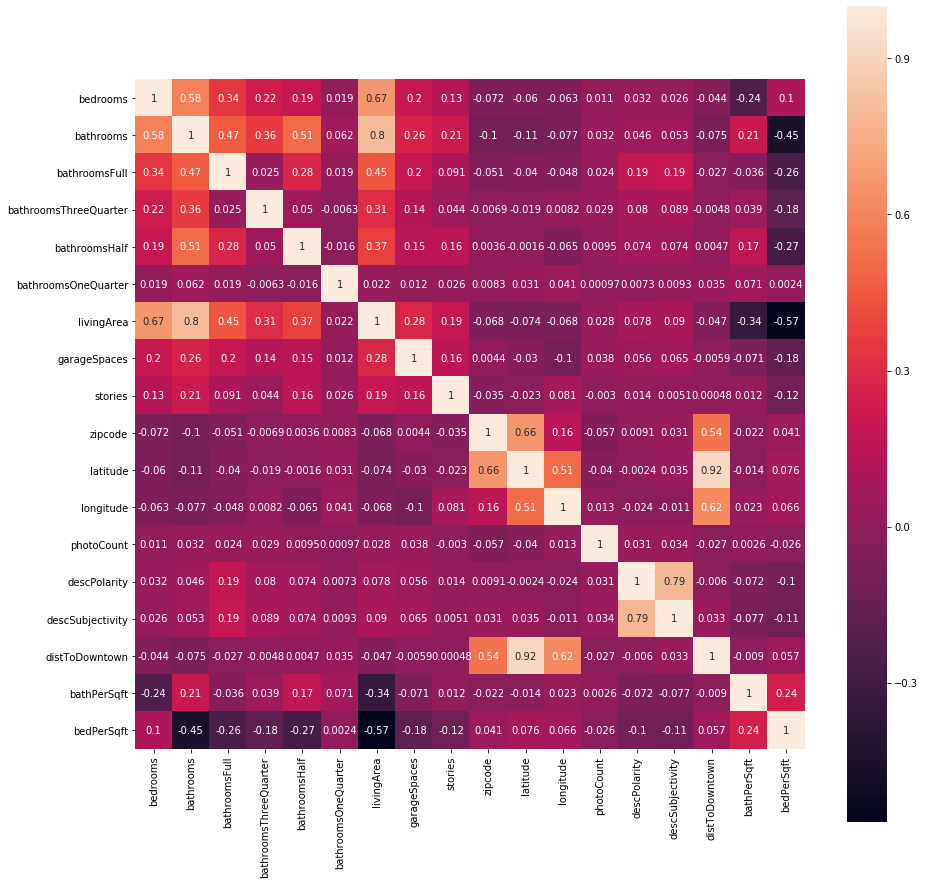

In [149]:
plt.figure(figsize=(15, 15))
sns.heatmap(numeric_data.corr(), annot=True, square=True)
#Code to fix bug with seaborn
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() 

In [154]:
scaled = StandardScaler().fit_transform(numeric_data.values)

In [156]:
scaled_df = pd.DataFrame(data=scaled)

In [157]:
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.209955,0.725604,-1.288722,-0.602889,-0.588036,-0.106035,-0.363168,1.267809,1.138868,-1.420676,-0.446438,0.843205,0.305661,1.184815,0.635586,-0.065097,1.707178,0.096837
1,0.735109,3.759849,0.930618,2.784530,3.354584,-0.106035,3.462114,0.752281,1.138868,-1.420676,-0.460265,0.974218,0.867309,0.569713,1.082483,0.007789,-0.232448,-1.808715
2,-0.209955,1.737019,-0.179052,1.090821,3.354584,-0.106035,2.528819,0.752281,0.015914,-1.420676,-0.425523,0.939130,0.706838,0.354445,0.262574,-0.015265,-0.840884,-1.937057
3,1.680174,2.748434,0.930618,2.784530,1.383274,-0.106035,3.429367,-0.794302,-1.107040,-1.420676,-0.467346,0.917269,0.706838,1.160218,1.263462,-0.021992,-0.730269,-1.469189
4,0.735109,-0.285811,0.930618,-0.602889,-0.588036,-0.106035,1.384714,2.298864,0.015914,-1.420676,-0.427040,0.978351,0.305661,0.011855,-0.424623,0.006240,-1.665329,-1.012452


In [164]:
pca = PCA(n_components=18)
principalComponents = pca.fit_transform(scaled)

In [168]:
pca_df = pd.DataFrame(data=principalComponents, columns=['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', \
                  'pc14', 'pc15', 'pc16', 'pc17'])

In [169]:
pca_df.head(5)

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17
0,0.066302,-0.526157,0.758771,1.662640,0.328301,0.982756,1.149426,0.260279,1.567870,-0.106733,0.967435,0.812705,1.846766,0.136089,-0.387820,-0.074734,-0.026136,-0.101927
1,6.479636,1.519415,-0.330137,1.327333,-0.679392,1.918705,-0.501516,0.109121,0.273974,-1.488095,-0.058612,1.450919,-0.757827,0.019848,0.387319,1.105439,0.111961,-0.484420
2,3.954011,0.716308,-0.274197,0.411059,-1.831938,1.245065,-0.083169,0.234828,-0.408500,-1.088207,0.204651,2.571238,-0.810588,-0.103619,-0.049015,0.838603,0.067458,0.044666
3,5.178527,1.063649,0.677631,-0.342068,0.786605,1.828848,-1.794395,-0.298384,-1.274520,-2.235029,0.217414,0.878450,-0.145079,0.011329,0.069277,0.686876,0.112739,0.067202
4,1.760597,0.006211,-0.182778,-2.200412,-0.266995,0.312135,1.605451,0.442437,0.154543,0.270363,2.235048,0.517675,0.091007,-0.100425,-0.320546,0.022854,-0.004733,0.492206


In [175]:
transformed_df = dataframe.join(pca_df).drop(['Unnamed: 0',"bedrooms", "bathrooms", "bathroomsFull", "bathroomsThreeQuarter", "bathroomsHalf",
                                "bathroomsOneQuarter", "livingArea", "garageSpaces", "stories", "zipcode",
                                "latitude", "longitude", "photoCount", "descPolarity", "descSubjectivity", "distToDowntown", 
                                "bathPerSqft", "bedPerSqft"], axis=1)

In [177]:
transformed_df.head(5)

,hasHeating,hasCooling,hasFireplace,furnished,hasAttachedGarage,hasGarage,hasOpenParking,hasCarport,hasPrivatePool,hasSpa,hasView,hasWaterfrontView,canRaiseHorses,hasAttachedProperty,hasLandLease,isNewConstruction,hasHomeWarranty,hasPetsAllowed,hasRentControl,isSeniorCommunity,price,imageId,imageIdCount,flooring_Carpet,flooring_Ceramic,flooring_Concrete,flooring_Hardwood,flooring_Laminate,flooring_Linoleum / Vinyl,flooring_Mixed,flooring_Other,flooring_Slate,flooring_Softwood,flooring_Tile,flooring_carpet,flooring_hardwood,flooring_laminate,flooring_tile,heating_Baseboard,heating_Forced Air,heating_Forced air,heating_Geothermal,heating_Heat pump,heating_Other,heating_Radiant,heating_Stove,heating_Wall,heating_baseboard,heating_forced air,heating_heat pump,cooling_C,cooling_Central,cooling_Evaporative,cooling_Geothermal,cooling_None,cooling_Other,cooling_Refrigeration,cooling_Solar,cooling_Wall,cooling_central,appliances_Air-To-Air Exchanger,appliances_Central Vacuum,appliances_Cooktop,appliances_Dehumidifier,appliances_Dishwasher,appliances_Disposal,appliances_Double Oven,appliances_Dryer,appliances_Dryer Included,appliances_Electric Dryer Connection,appliances_Electric Water Heater,appliances_Electronic Air Filter,appliances_Exhaust Fan/Hood,appliances_Freezer,appliances_Fuel Tank - Owned,appliances_Fuel Tank - Rented,appliances_Furnace Humidifier,appliances_Garbage disposal,appliances_Gas Dryer Connections,appliances_Gas Water Heater,appliances_Hood,appliances_Indoor Grill,appliances_Iron Filter,appliances_Microwave,appliances_None,appliances_Other,appliances_Oven,appliances_Range,appliances_Range / Oven,appliances_Range/Stove,appliances_Refrigerator,appliances_Tankless Water Heater,appliances_Trash Compactor,appliances_Trash compactor,appliances_Wall Oven,appliances_Washer,appliances_Washer Included,appliances_Water Filtration System,appliances_Water Osmosis System,appliances_Water Softener - Owned,appliances_Water Softener - Rented,appliances_dishwasher,appliances_dryer,appliances_range oven,appliances_refrigerator,appliances_washer,parkingFeatures_Attached Garage,parkingFeatures_Carport,parkingFeatures_Covered Parking,parkingFeatures_Detached Garage,parkingFeatures_Garage,parkingFeatures_None,parkingFeatures_Off street,parkingFeatures_On street,parkingFeatures_garage attached,parkingFeatures_garage detached,exteriorFeatures_Brick,exteriorFeatures_Cement concrete,exteriorFeatures_Composition,exteriorFeatures_Metal,exteriorFeatures_Other,exteriorFeatures_Shingle,exteriorFeatures_Stone,exteriorFeatures_Stucco,exteriorFeatures_Vinyl,exteriorFeatures_Wood,exteriorFeatures_Wood products,exteriorFeatures_deck,exteriorFeatures_fenced yard,exteriorFeatures_lawn,exteriorFeatures_parking,exteriorFeatures_patio,exteriorFeatures_porch,foundationDetails_Concrete,foundationDetails_Concrete Block,foundationDetails_Crawl/Raised,foundationDetails_Masonry,foundationDetails_Other,foundationDetails_Piers,foundationDetails_Retaining Wall,foundationDetails_Slab,foundationDetails_Stone,foundationDetails_Wood,view_Bay,view_City,view_City Lights,view_Inland Lake,view_Lake Superior,view_Limited,view_Mountain,view_Panoramic,view_Park,view_River,view_Territorial,view_Typical,view_Valley,view_Water,homeType_homeType_Apartment,homeType_homeType_Condo,homeType_homeType_Cooperative,homeType_homeType_Miscellaneous,homeType_homeType_Mobile_/_Manufactured,homeType_homeType_Multi_Family,homeType_homeType_Multiple_Occupancy,homeType_homeType_Single_Family,homeType_homeType_Townhouse,homeType_homeType_Vacant_Land,roofType_roofType_Asphalt,roofType_roofType_Built_up,roofType_roofType_Composition,roofType_roofType_Metal,roofType_roofType_Other,roofType_roofType_Shake/Shingle,roofType_roofType_Slate,roofType_roofType_Tile,structureType_structureType_Bungalow,structureType_structureType_Cape_cod,structureType_structureType_Colonial,structureType_structureType_Contemporary,structureType_structureType_Craftsman,structureType_structureType_French,structureType_struct

In [178]:
new_df.to_csv('transformed_data.csv')